In [2]:
# Set up plotting for Jupyter
%matplotlib inline
import matplotlib as plt
plt.pylab.rcParams['figure.figsize'] = 9, 9
plt.style.use('ggplot')

import pandas
import dateutil
from dateutil import parser
from datetime import date

names = ['Clinton', 'Sanders', 'O\'Malley', 'Fiorina', 'Trump', 'Carson', 'Cruz', 'Rubio', 'Bush']

# Load data and format with short column names and native date index
mentions = pandas.read_csv("MediaCloudCounts.csv")
mentions.columns = ['date'] + names
mentions.date = [dateutil.parser.parse(x) for x in mentions.date]
mentions.set_index('date', inplace=True)
mentions.head()

,Clinton,Sanders,O'Malley,Fiorina,Trump,Carson,Cruz,Rubio,Bush
date,,,,,,,,,
2015-01-01,34,2,8,1,1,2,8,10,72
2015-01-02,39,10,4,6,4,10,7,4,13
2015-01-03,6,4,0,1,4,1,5,8,6
2015-01-04,15,2,0,3,1,3,9,6,17
2015-01-05,48,13,3,1,38,9,16,13,65


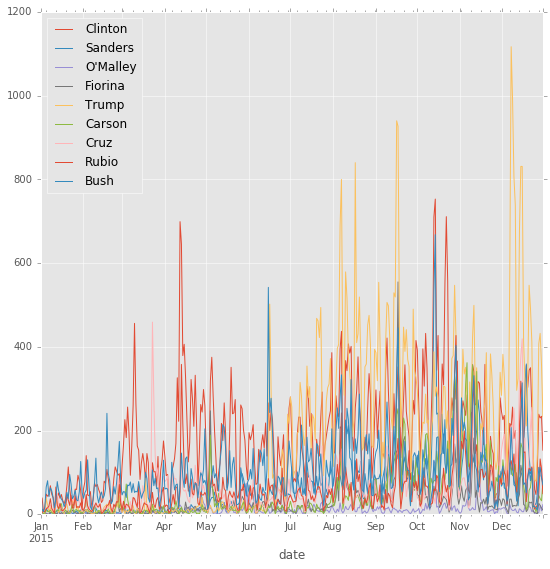

In [3]:

mentions.plot()


In [4]:
mentionsWeek = mentions.resample('7D',how='sum')
mentionsWeek.head()

,Clinton,Sanders,O'Malley,Fiorina,Trump,Carson,Cruz,Rubio,Bush
date,,,,,,,,,
2015-01-01,232,46,16,12,75,37,77,76,295
2015-01-08,283,30,12,23,99,40,155,160,345
2015-01-15,360,37,14,17,84,72,138,151,247
2015-01-22,348,33,3,32,144,71,234,174,370
2015-01-29,468,37,13,29,43,88,148,149,509


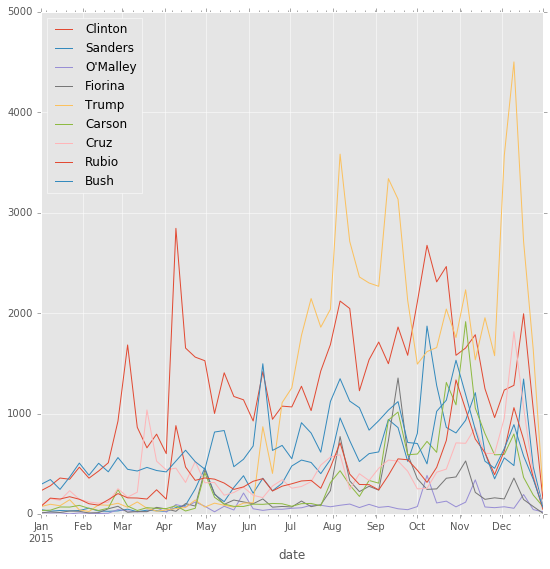

In [5]:
mentionsWeek.plot()
mentionsWeek.to_csv("mentionsWeek.csv")

In [6]:
mentionsMonth = mentions.resample('1M',how='sum')
mentionsMonth.head()

,Clinton,Sanders,O'Malley,Fiorina,Trump,Carson,Cruz,Rubio,Bush
date,,,,,,,,,
2015-01-31,1368,164,49,90,418,234,661,616,1489
2015-02-28,1860,147,45,154,316,340,625,559,1965
2015-03-31,4561,173,168,164,304,369,1948,779,1911
2015-04-30,7064,641,348,290,320,243,1872,1907,2251
2015-05-31,5427,1064,334,930,392,803,1130,1339,2763


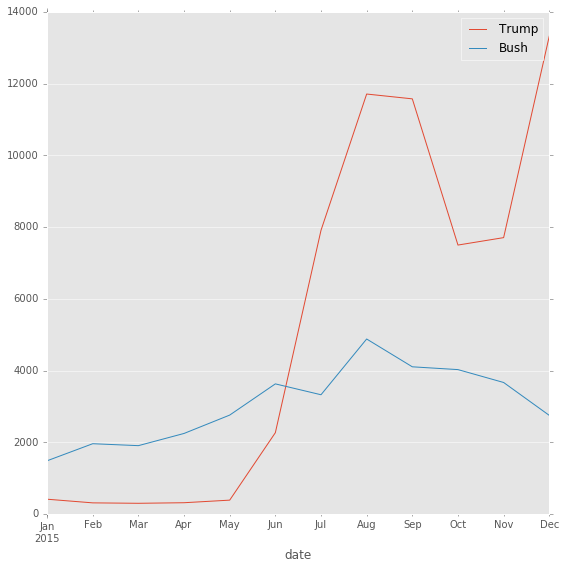

In [78]:
mentionsMonth.loc[:,['Trump','Bush']].plot()

In [8]:
pollsR = pandas.read_csv("2016-national-gop-primary.csv")
pollsD = pandas.read_csv("2016-national-democratic-primary.csv")
polls = pandas.concat([pollsR,pollsD])
polls['Start Date'] = [dateutil.parser.parse(x) for x in polls['Start Date']]
polls['End Date'] = [dateutil.parser.parse(x) for x in polls['End Date']]
polls.head()

,Affiliation,Biden,Bush,Carson,Chafee,Christie,Clinton,Cruz,End Date,Entry Date/Time (ET),...,Rand Paul,Rubio,Sanders,Santorum,Source URL,Start Date,Trump,Undecided,Walker,Webb
0,None,NaN,6,12,NaN,2,NaN,14,2015-12-30,2015-12-31 18:03:07 UTC 2015-12-31 18:03:07 UTC,...,3,12,NaN,1,NaN,2015-12-26,39,6,NaN,NaN
1,None,NaN,7,10,NaN,3,NaN,13,2015-12-23,2015-12-24 02:46:55 UTC 2015-12-24 02:46:55 UTC,...,2,9,NaN,3,NaN,2015-12-19,39,6,NaN,NaN
2,None,NaN,5,7,NaN,3,NaN,19,2015-12-21,2015-12-28 15:19:13 UTC 2015-12-28 15:19:13 UTC,...,6,14,NaN,1,NaN,2015-12-18,35,2,NaN,NaN
3,None,NaN,3,10,NaN,5,NaN,18,2015-12-21,2015-12-23 12:12:21 UTC 2015-12-23 12:12:21 UTC,...,4,10,NaN,0,NaN,2015-12-17,39,2,NaN,NaN
4,None,NaN,6,7,NaN,6,NaN,21,2015-12-20,2015-12-21 16:37:14 UTC 2015-12-21 16:37:14 UTC,...,1,13,NaN,NaN,NaN,2015-12-17,36,1,NaN,NaN


In [9]:
# Now construct daily time series for each of our candidates, by simple average of the polls that are active on each day
def activePollsOnDay(day, name):  
  pcts = polls[(polls['Start Date'] <= day) & (polls['End Date'] >= day)][name]
  return pcts[~pcts.isnull()] # strip NA, not every poll includes every candidate




In [10]:
activePollsOnDay(date(2015,9,11),"Clinton")

70    55
87    45
88    54
89    47
Name: Clinton, dtype: float64

In [11]:
# Generate average of polls on each day, for each candidate
dates = mentions.index
pollsDay = pandas.DataFrame(index=dates)
for name in names:
    cand = pandas.DataFrame([activePollsOnDay(d,name).mean() for d in dates], index=dates)
    pollsDay.insert(0,name,cand)
pollsDay.head()


,Bush,Rubio,Cruz,Carson,Trump,Fiorina,O'Malley,Sanders,Clinton
date,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Now generate a weekly series by averaging all the polls on each day of that week
from datetime import timedelta 
def weeklySeries(name):
    day = dates[0]
    lastDay = dates[-1] - timedelta(6)
                           
    # while there is still a week of days left...
    outDates = []
    outPcts = []
    while day <= lastDay:   
        outDates.append(day)
    
        pcts = []
        for i in range(0,7):
            pcts = pcts + list(activePollsOnDay(day, name))
            day = day + timedelta(1)

        if len(pcts):
            outPcts.append(sum(pcts)/len(pcts))
        else:
            outPcts.append(float('Nan'))
    
    return pandas.DataFrame(outPcts, columns=[name], index=outDates)
    
    
pollsWeek = pandas.DataFrame()
for name in names:
    pollsWeek = pandas.concat([pollsWeek, weeklySeries(name)], axis=1)
pollsWeek.head()


,Clinton,Sanders,O'Malley,Fiorina,Trump,Carson,Cruz,Rubio,Bush
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,61.000000,3.000000,0.000000,NaN,NaN,10.000000,9.000000,2,12
2015-01-15,59.000000,4.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-22,57.857143,2.428571,1.428571,NaN,NaN,12.428571,6.857143,5,14
2015-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


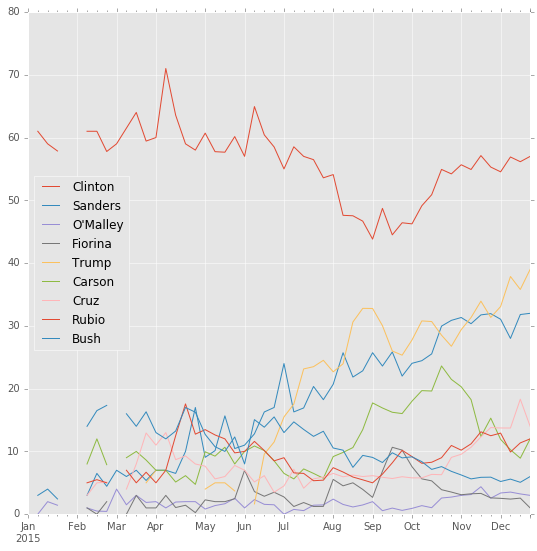

In [13]:
pollsWeek.plot()
pollsWeek.to_csv("pollsWeek.csv")

In [14]:
# Monthly series for June-Dec 2015
from datetime import timedelta 
def  monthlySeries(name):
    monthDays = [0,31,28,31,30,31,30,31,31,30,31,30,31]
    outDates = []
    outPcts = []
    
    for month in range(6,13):                       
        outDates.append(date(2015, month, 1))
    
        pcts = []
        for day in range(1,monthDays[month]+1):    
            pcts = pcts + list(activePollsOnDay(date(2015,month,day), name))

        if len(pcts):
            outPcts.append(sum(pcts)/len(pcts))
        else:
            outPcts.append(float('Nan'))
    
    return pandas.DataFrame(outPcts, columns=[name], index=outDates)
    

pollsMonth = pandas.DataFrame()
for name in names:
    pollsMonth = pandas.concat([pollsMonth, monthlySeries(name)], axis=1)
pollsMonth


,Clinton,Sanders,O'Malley,Fiorina,Trump,Carson,Cruz,Rubio,Bush
2015-06-01,61.588235,13.941176,2.000000,3.676471,6.230769,10.088235,5.441176,10.235294,14.088235
2015-07-01,56.803030,18.575758,1.030303,1.407407,21.397590,6.337349,5.819277,6.096386,13.301205
2015-08-01,49.986667,21.760000,1.600000,4.020833,26.104167,9.218750,6.062500,6.322917,10.541667
2015-09-01,45.699187,24.203252,0.983051,8.032258,28.096774,16.556452,5.927419,7.629032,9.104839
2015-10-01,50.733333,26.658333,1.571429,5.187500,28.937500,20.554688,6.554688,9.031250,7.804688
2015-11-01,55.688172,31.118280,3.215054,3.260870,30.423913,17.945652,10.923913,11.554348,6.065217
2015-12-01,55.500000,30.750000,3.312500,2.412371,34.979381,10.989691,14.855670,11.701031,5.391753


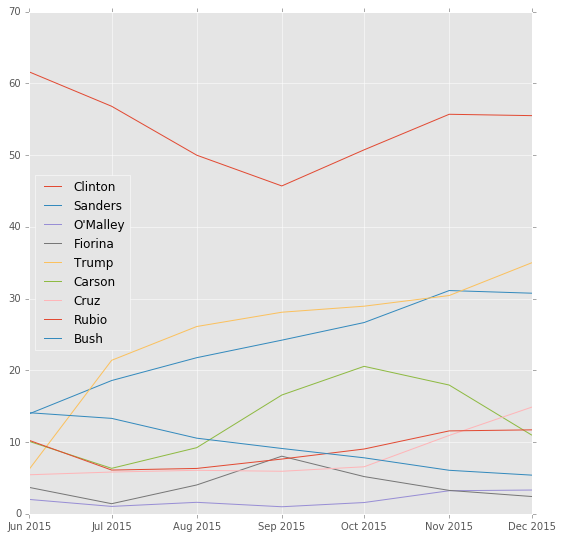

In [15]:
pollsMonth.plot()


In [ ]:
candidates = ["Trump","Clinton","Sanders","Rubio","Carson"]
followers = [5500000,5010000,1140000,1040000,1080000]
decpoll = [pollsMonth[name][-1] for name in candidates]
socMedia = pandas.DataFrame(followers,index=candidates,columns=['Twitter followers'])
socMedia.insert(0,"December polls",decpoll)

ax = socMedia.plot(kind='scatter', x="Twitter followers", y="December polls")

for i,name in enumerate(candidates):
    ax.annotate(name, (followers[i], decpoll[i]))

In [ ]:
mentionsMonth['Sanders'][-1]

In [85]:
# Compute average poll and total mentions for Q4 for each candidate
pollsQ4 = pollsMonth.iloc[[-1,-2,-3],:].mean()
mentionsQ4 = mentionsMonth.iloc[[-1,-2,-3],:].sum()
pollsMentionsQ4 = pandas.concat([pollsQ4,mentionsQ4], axis=1)
pollsMentionsQ4.columns = ['polls','mentions']

# Now take mentions as percetnage of total for GOP/DEM respectively
GOPnames = ['Fiorina','Trump','Carson','Cruz','Rubio','Bush'] 
DEMnames = ['Clinton','Sanders','O\'Malley']
DEMmentionsQ4 = pollsMentionsQ4.loc[DEMnames,'mentions'].sum()
GOPmentionsQ4 = pollsMentionsQ4.loc[GOPnames,'mentions'].sum()
pollsMentionsQ4.loc[GOPnames,'pctmentions'] = pollsMentionsQ4.loc[GOPnames,'mentions'] * 100 / GOPmentionsQ4
pollsMentionsQ4.loc[DEMnames,'pctmentions'] = pollsMentionsQ4.loc[DEMnames,'mentions'] * 100 / DEMmentionsQ4

# while we're at it, take polls as percentage of totals for these candidates
DEMpollsQ4 = pollsMentionsQ4.loc[DEMnames,'polls'].sum()
GOPpollsQ4 = pollsMentionsQ4.loc[GOPnames,'polls'].sum()
pollsMentionsQ4.loc[GOPnames,'pctpolls'] = pollsMentionsQ4.loc[GOPnames,'polls'] * 100 / GOPpollsQ4
pollsMentionsQ4.loc[DEMnames,'pctpolls'] = pollsMentionsQ4.loc[DEMnames,'polls'] * 100 / DEMpollsQ4


pollsMentionsQ4.to_csv('pollsMentionsQ4.csv')
pollsMentionsQ4

,polls,mentions,pctmentions,pctpolls
Clinton,53.973835,22521,62.596587,62.627469
Sanders,29.508871,11683,32.472622,34.240033
O'Malley,2.699661,1774,4.930791,3.132498
Fiorina,3.620247,3384,4.751207,4.552355
Trump,31.446931,28539,40.069359,39.543599
Carson,16.496677,10737,15.074975,20.744090
Cruz,10.778090,9170,12.874874,13.553134
Rubio,10.762210,8936,12.546333,13.533165
Bush,6.420552,10458,14.683253,8.073657
